In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rainfall_ds = xr.open_dataset("./rainfall_hadukgrid_uk_1km_ann_201001-201012.nc")
rainfall_df = rainfall_ds.to_dataframe()

In [3]:
# store time
time = rainfall_ds.time
print(time)

<xarray.DataArray 'time' (time: 1)>
array(['2010-07-02T21:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2010-07-02T21:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time


In [4]:
rainfall_df.columns

Index(['rainfall', 'transverse_mercator', 'time_bnds',
       'projection_y_coordinate_bnds', 'projection_x_coordinate_bnds',
       'latitude', 'longitude'],
      dtype='object')

In [5]:
rainfall_df.index.names

FrozenList(['time', 'projection_y_coordinate', 'projection_x_coordinate', 'bnds'])

In [6]:
rainfall_df

rainfall  \
time                projection_y_coordinate projection_x_coordinate bnds             
2010-07-02 21:00:00 -199500.0               -199500.0               0          NaN   
                                                                    1          NaN   
                                            -198500.0               0          NaN   
                                                                    1          NaN   
                                            -197500.0               0          NaN   
...                                                                            ...   
                     1249500.0               697500.0               1          NaN   
                                             698500.0               0          NaN   
                                                                    1          NaN   
                                             699500.0               0          NaN   
                                                                    1          NaN   

                                                                          transverse_mercator  \
time                projection_y_coordinate projection_x_coordinate bnds                        
2010-07-02 21:00:00 -199500.0               -199500.0               0             -2147483647   
                                                                    1             -2147483647   
                                            -198500.0               0             -2147483647   
                                                                    1             -2147483647   
                                            -197500.0               0             -2147483647   
...                                                                                       ...   
                     1249500.0               697500.0               1             -2147483647   
                                             698500.0               0             -2147483647   
                                                                    1             -2147483647   
                                             699500.0               0             -2147483647   
                                                                    1             -2147483647   

                                                                                   time_bnds  \
time                projection_y_coordinate projection_x_coordinate bnds                       
2010-07-02 21:00:00 -199500.0               -199500.0               0    2010-01-01 09:00:00   
                                                                    1    2011-01-01 09:00:00   
                                            -198500.0               0    2010-01-01 09:00:00   
                                                                    1    2011-01-01 09:00:00   
                                            -197500.0               0    2010-01-01 09:00:00   
...                                                                                      ...   
                     1249500.0               697500.0               1    2011-01-01 09:00:00   
                                             698500.0               0    2010-01-01 09:00:00   
                                                                    1    2011-01-01 09:00:00   
                                             699500.0               0    2010-01-01 09:00:00   
                                                                    1    2011-01-01 09:00:00   

                                                                          projection_y_coordinate_bnds  \
time                projection_y_coordinate projection_x_coordinate bnds                                 
2010-07-02 21:00:00 -199500.0               -199500.0               0                        -200000.0   
                                                                    1                        -199000.0   
                    

In [7]:
# drop index columns
rainfall_df.reset_index(drop=True, inplace=True)

In [8]:
rainfall_df

,rainfall,transverse_mercator,time_bnds,projection_y_coordinate_bnds,projection_x_coordinate_bnds,latitude,longitude
0,NaN,-2147483647,2010-01-01 09:00:00,-200000.0,-200000.0,47.824377,-10.012910
1,NaN,-2147483647,2011-01-01 09:00:00,-199000.0,-199000.0,47.824377,-10.012910
2,NaN,-2147483647,2010-01-01 09:00:00,-200000.0,-199000.0,47.825306,-9.999679
3,NaN,-2147483647,2011-01-01 09:00:00,-199000.0,-198000.0,47.825306,-9.999679
4,NaN,-2147483647,2010-01-01 09:00:00,-200000.0,-198000.0,47.826233,-9.986447
...,...,...,...,...,...,...,...
2609995,NaN,-2147483647,2011-01-01 09:00:00,1250000.0,698000.0,61.015832,3.508300
2609996,NaN,-2147483647,2010-01-01 09:00:00,1249000.0,698000.0,61.015077,3.526714
2609997,NaN,-2147483647,2011-01-01 09:00:00,1250000.0,699000.0,61.015077,3.526714
2609998,NaN,-2147483647,2010-01-01 09:00:00,1249000.0,699000.0,61.014319,3.545128


In [9]:
rainfall_df = rainfall_df[["rainfall", "latitude", "longitude"]]

In [10]:
rainfall_df.dropna(inplace=True)

/tmp/ipykernel_3232/2369707598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_df.dropna(inplace=True)


In [11]:
rainfall_df

,rainfall,latitude,longitude
374976,865.953973,49.894822,-6.338151
374977,865.953973,49.894822,-6.338151
378580,868.313730,49.913798,-6.311983
378581,868.313730,49.913798,-6.311983
378582,868.806965,49.914315,-6.298093
...,...,...,...
2551921,1186.608546,60.836349,-0.886983
2551922,1101.830142,60.836196,-0.868590
2551923,1101.830142,60.836196,-0.868590
2551926,1109.076899,60.835881,-0.831805


In [12]:
# all boiled down:
sun_ds = xr.open_dataset("./sun_hadukgrid_uk_1km_ann_201001-201012.nc")
sun_df = sun_ds.to_dataframe()
sun_df.reset_index(drop=True, inplace=True)
sun_df = sun_df[["sun", "latitude", "longitude"]]
sun_df.dropna(inplace=True)

In [13]:
wind_ds = xr.open_dataset("./sfcWind_hadukgrid_uk_1km_ann_201001-201012.nc")
wind_df = wind_ds.to_dataframe()
wind_df.reset_index(drop=True, inplace=True)
wind_df = wind_df[["sfcWind", "latitude", "longitude"]]
wind_df.dropna(inplace=True)

In [14]:
assert all(sun_df.latitude == wind_df.latitude)
assert all(sun_df.longitude == wind_df.longitude)

In [15]:
print(rainfall_df.shape[0])
print(sun_df.shape[0])
print(wind_df.shape[0])

490154
490154
490154


In [21]:
rainfall_df.rainfall = (rainfall_df.rainfall + min(rainfall_df.rainfall)) / (min(rainfall_df.rainfall) + max(rainfall_df.rainfall))
sun_df.sun = (sun_df.sun + min(sun_df.sun)) / (min(sun_df.sun) + max(sun_df.sun))
wind_df.sfcWind = (wind_df.sfcWind + min(wind_df.sfcWind)) / (min(wind_df.sfcWind) + max(wind_df.sfcWind))

/tmp/ipykernel_3232/1392147013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_df.rainfall = (rainfall_df.rainfall + min(rainfall_df.rainfall)) / (min(rainfall_df.rainfall) + max(rainfall_df.rainfall))


In [22]:
data = pd.concat([rainfall_df, sun_df, wind_df],axis=1)
data.dropna(inplace=True)
latitude = rainfall_df["latitude"]
longitude = rainfall_df["longitude"]
data.drop(["latitude", "longitude"], axis=1, inplace=True)
data["latitude"] = latitude
data["longitude"] = longitude
data

,rainfall,sun,sfcWind,latitude,longitude
374976,0.572217,1.000000,0.529037,49.894822,-6.338151
374977,0.572217,1.000000,0.529037,49.894822,-6.338151
378580,0.572557,0.998884,0.532667,49.913798,-6.311983
378581,0.572557,0.998884,0.532667,49.913798,-6.311983
378582,0.572628,0.998641,0.534691,49.914315,-6.298093
...,...,...,...,...,...
2551921,0.618414,0.775164,0.720866,60.836349,-0.886983
2551922,0.606200,0.780248,0.640013,60.836196,-0.868590
2551923,0.606200,0.780248,0.640013,60.836196,-0.868590
2551926,0.607244,0.783825,0.613493,60.835881,-0.831805


In [23]:
def plot_something(latitude, longitude, something):
    """
    x = r λ cos(φ0)
    y = r φ

    r = radius of earth
    """
    r = 6271 # km
    phi_0 = (min(latitude) + max(latitude)) / 2

    x = r * longitude * np.cos(phi_0)
    y = r * latitude

    fig, ax = plt.subplots(figsize=(6,10))
    ax.hist2d(x, y, weights=something, bins=150)
    plt.show()

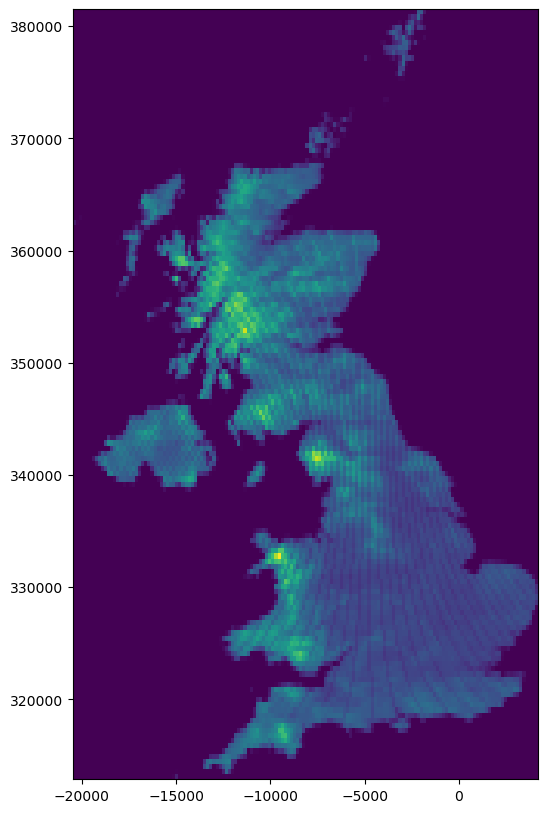

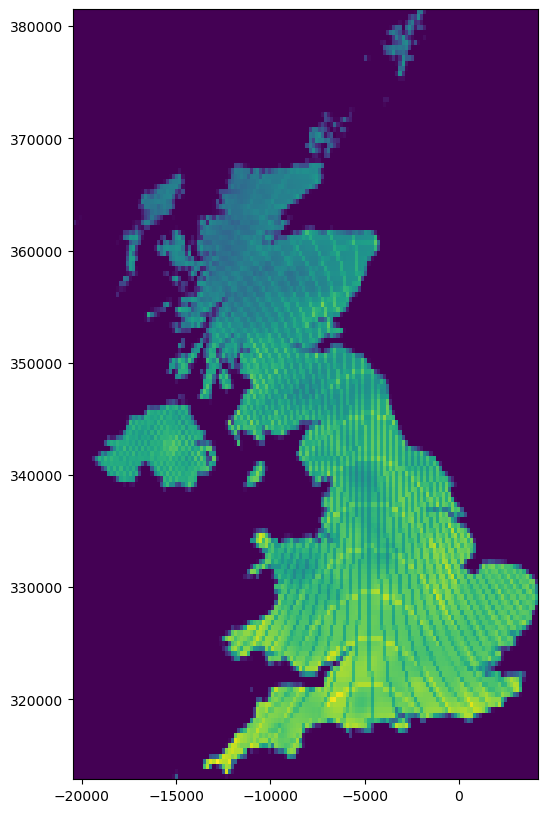

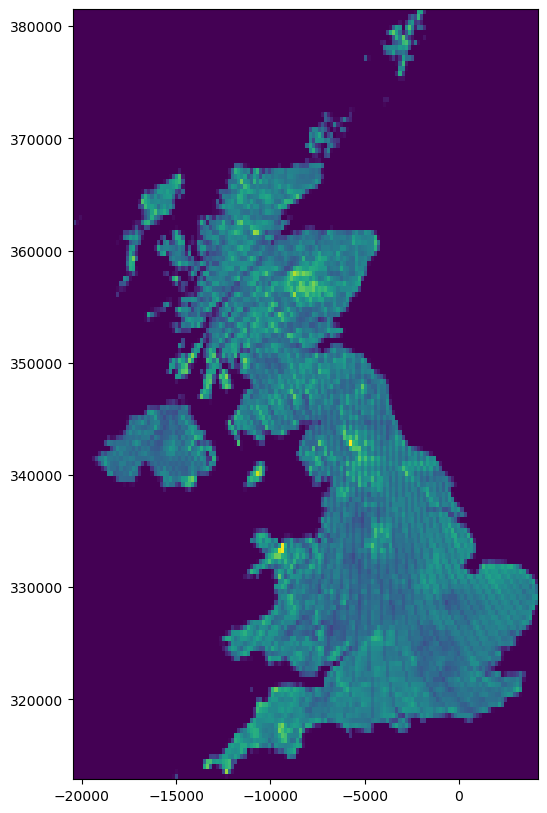

In [18]:
plot_something(data.latitude, data.longitude, data.rainfall)
plot_something(data.latitude, data.longitude, data.sun)
plot_something(data.latitude, data.longitude, data.sfcWind)